In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from Bio import SeqIO
import squarify
plt.style.use("seaborn-paper")


                          Correct  Total      Ratio
Domain function in total      177    215  82.325581
Extender units                 72     92  78.260870
Non-extending domains         103    123  83.739837
Starter units                   5      8  62.500000


Text(82, 0, '175/223')

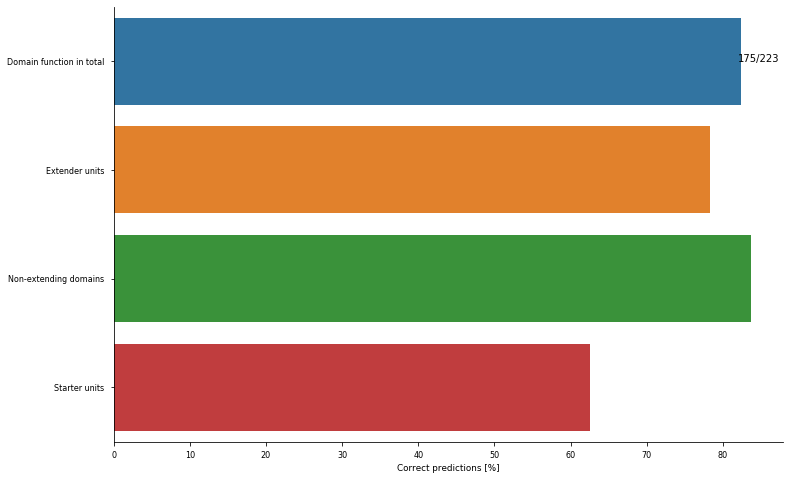

In [2]:
prediction_scores = {
    "Domain function in total": [177, 215],
    "Extender units": [72, 92],
    "Non-extending domains": [103, 123],
    "Starter units": [5, 8]}


fig, ax = plt.subplots(1, figsize = (12, 8))
df = pd.DataFrame(prediction_scores).T
df.columns = ["Correct", "Total"]
df["Ratio"] = 100*df["Correct"] / df["Total"]
print(df)
plt.set_cmap("tab10")
b = sns.barplot(y = df.index, x = "Ratio", data = df, ax = ax)
sns.despine()
ax.set_xlabel("Correct predictions [%]")
ax.set_ylabel("")
ax.annotate("175/223", (82, -0))

In [3]:
for bar in b.patches:
    print(bar.get_height())
    print(bar.get_xy())

0.8
(0, -0.4)
0.8
(0, 0.6)
0.8
(0, 1.6)
0.8
(0, 2.6)


# Figure 2


In [68]:
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt

RiPPS = ["lanthipeptide", "thiopeptide", "lassopeptide"]

In [5]:
def _get_strain_knowledge(cluster_path):  # yes
    gb_list = []
    for gb_record in SeqIO.parse(open(cluster_path, "r"), "genbank"):
        gb_list.append(gb_record)
    g = gb_list[0]
    return g.annotations["taxonomy"]

In [59]:
""" Create the figure displaying the number of successful bigmec constructions"""
filename = "../Data/constructed_pathways/summary.csv"
df = pd.read_csv(filename, index_col = 0)
print(df)

       BGC  Success     BGC type
0        1        1        T1PKS
1       10        0          NaN
2      100        1        T1PKS
3     1000        1         NRPS
4     1001        1         NRPS
...    ...      ...          ...
1878   995        1  transAT-PKS
1879   996        1         NRPS
1880   997        1         NRPS
1881   998        1         NRPS
1882   999        1         NRPS

[1883 rows x 3 columns]


In [70]:
# Rename
df_success = df.loc[df["Success"]== 1, :]
bgc_type_merge =  []
for x in  df_success["BGC type"]:
    lst = x.split("-")
    if (len(lst) > 1) and lst[0]==lst[1]:
        bgc_class = lst[0]
    else:
        bgc_class = x
    if bgc_class.strip() in RiPPS:
        bgc_class = "RiPPs"
    bgc_type_merge.append(bgc_class)
df_success["BGC class"] = bgc_type_merge


C:\Users\snorres\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:13 SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [72]:
cluster_types = df_success.groupby("BGC class").count()

In [73]:
cluster_types["BGC"].name = ""

In [74]:
cluster_types

,BGC,Success,BGC type
BGC class,,,
NRPS,528,528,528
NRPS-like,20,20,20
RiPPs,133,133,133
T1PKS,316,316,316
transAT-PKS,67,67,67
transAT-PKS-like,12,12,12


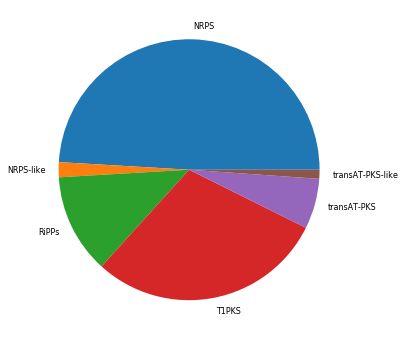

In [75]:
# Convert to treemap
fig = cluster_types["BGC"].plot(title = None, figsize = (6, 6), kind = "pie")
plt.savefig("bigmec_pie_chart.svg")

In [76]:
colors = plt.get_cmap("tab10", len(cluster_types.index))

In [77]:
colors.colors

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.7372549 , 0.74117647, 0.13333333, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ]])

In [78]:
cluster_types

,BGC,Success,BGC type
BGC class,,,
NRPS,528,528,528
NRPS-like,20,20,20
RiPPs,133,133,133
T1PKS,316,316,316
transAT-PKS,67,67,67
transAT-PKS-like,12,12,12


(0.0, 100.0, 0.0, 100.0)

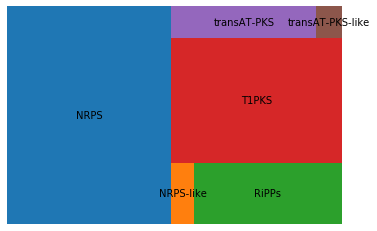

In [79]:
l = squarify.plot(label = cluster_types.index, sizes = cluster_types["BGC"], color=sns.color_palette("tab10"))
plt.axis("off")
#plt.legend(l.get_legend_handles_labels())

In [16]:
squarify.plot?

In [17]:
bgc_ids = list(df_success["BGC"])
taxonomy_list = []
for i in bgc_ids:
    fn = "../Data/mibig/{0}.gbk".format(i)
    tax = _get_strain_knowledge(fn)
    taxonomy_list.append(tax)

In [18]:
df_tax = pd.DataFrame(taxonomy_list)
df_tax = df_tax.sort_values(0)

In [19]:
df_tax

,0,1,2,3,4,5,6,7,8,9,10,11
0,Bacteria,Actinobacteria,Micromonosporales,Micromonosporaceae,Verrucosispora,None,None,None,None,None,None,None
686,Bacteria,Actinobacteria,Pseudonocardiales,Pseudonocardiaceae,Amycolatopsis,None,None,None,None,None,None,None
687,Bacteria,Actinobacteria,Corynebacteriales,Nocardiaceae,Nocardia,None,None,None,None,None,None,None
688,Bacteria,Proteobacteria,Deltaproteobacteria,Myxococcales,Sorangiineae,Polyangiaceae,Jahnella,None,None,None,None,None
689,Bacteria,Proteobacteria,Deltaproteobacteria,Myxococcales,Sorangiineae,Polyangiaceae,Jahnella,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
253,Eukaryota,Fungi,Dikarya,Ascomycota,Pezizomycotina,Eurotiomycetes,Eurotiomycetidae,Eurotiales,Thermoascaceae,Byssochlamys,None,None
331,Eukaryota,Fungi,Dikarya,Ascomycota,Pezizomycotina,Sordariomycetes,Sordariomycetidae,Sordariales,Chaetomiaceae,Thermothelomyces,None,None
98,None,None,None,None,None,None,None,None,None,None,None,None
100,None,None,None,None,None,None,None,None,None,None,None,None


In [20]:
#g1 = df_tax.groupby([1, 2]).size().unstack(fill_value = 0)
g1 = df_tax.groupby(1).size()
g01 = df_tax.groupby([0, 1]).size().unstack(fill_value = 0)

In [21]:
g0 = df_tax.groupby(0).size()

In [22]:
g1["Fungi"] = g1.pop("Fungi")


In [23]:
 206

206

In [24]:
g1["Others"] = g1[g1<5].sum()
g1.name = ""

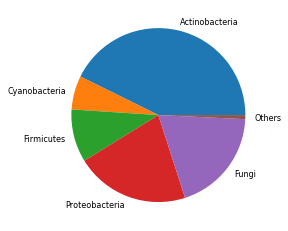

In [25]:
g1[g1>5].plot(kind = "pie", )

[None, None, None, None, None, None, None, None, None, None, None, None]

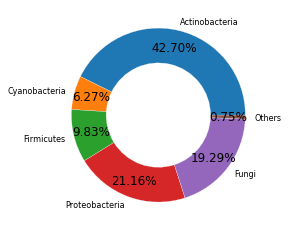

In [27]:
pie,_,txt = plt.pie(g1[g1>5], labels = g1[g1>5].index, radius = 1,autopct='%1.2f%%',  pctdistance=.8, )
#plt.legend(loc = )
width = 0.4
plt.setp(pie, width=width, edgecolor='white')
plt.setp(txt, size = 12)#, weight="bold")
#pi2, _ = plt.pie(g0, radius = 0.8)

# Figure knockouts


In [28]:

fn = "../Data/knockouts/all_optknock_results_0.5.csv"
df = pd.read_csv(fn)

In [29]:
g = df.groupby("BGC")

In [30]:
idx = g["Production", "B"].max()

C:\Users\snorres\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


KeyError: "Columns not found: 'B'"

In [31]:
max_rows = []
for i, group in g:
    maxx = group["Production"].max()
    ix = group["Production"] == maxx
    selected = group.loc[ix, :]
    
    max_rows += list(selected.index)
    

In [32]:
max_df = df.loc[max_rows, ["ID", "BGC type"]]

In [33]:
count_df = max_df.groupby(['ID', 'BGC type']).size().unstack(fill_value=0)

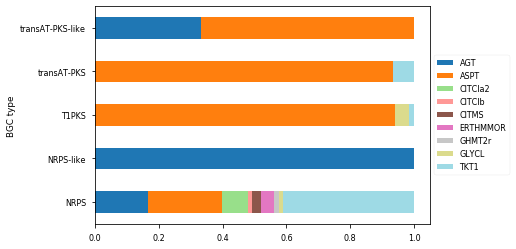

In [34]:
count_df_ratio = count_df/count_df.sum(axis = 0)
count_df_ratio.T.plot(kind = "barh", stacked = True, cmap = "tab20")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [35]:
squarify.plot?

In [36]:
count_df_full = df.groupby(['ID', 'BGC type']).size().unstack(fill_value=0)

In [37]:
count_df_full_ratio = count_df_full/count_df_full.sum(axis = 0)

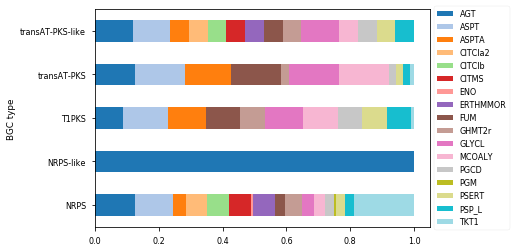

In [38]:
count_df_full_ratio.T.plot(kind = "barh", stacked = True, cmap = "tab20")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

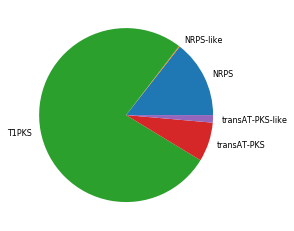

In [39]:
all_count = df.groupby("BGC type").count()["BGC"]
all_count.name = ""
all_count.plot(kind = "pie")

# Figure BGC length


In [43]:
from pathlib import Path
import cobra
folder = Path("../Data/constructed_pathways/")


In [50]:
df_success

,BGC,Success,BGC type,BGC class
0,1,1,T1PKS,T1PKS
2,100,1,T1PKS,T1PKS
3,1000,1,NRPS,NRPS
4,1001,1,NRPS,NRPS
5,1002,1,NRPS,NRPS
...,...,...,...,...
1878,995,1,transAT-PKS,transAT-PKS
1879,996,1,NRPS,NRPS
1880,997,1,NRPS,NRPS
1881,998,1,NRPS,NRPS


In [80]:
model_info_list = []
n_reactions_link_list = []
substrate_dct_list = []
bgc_type_list = []
for fn in folder.glob("*.json"):
    model = cobra.io.load_json_model(str(fn))
    n_reactions_total, n_reactions_link, substrate_dct = _get_model_info(model)
    model_info_list.append([fn.stem, n_reactions_link, n_reactions_total])
    substrate_dct_list.append(substrate_dct)

C:\Users\snorres\AppData\Local\Continuum\miniconda3\lib\site-packages\pandas\core\ops\array_ops.py:253 FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [88]:
df_info = pd.DataFrame(model_info_list, columns = ["ID", "Pathway length", "Total number of reactions"])

ValueError: 3 columns passed, passed data had 4 columns

In [96]:
df_info["ID"] = df_info["ID"].astype(int)
#df_info.drop(columns = "BGC type", inplace = True)

In [178]:
df_info

,ID,Pathway length,Total number of reactions,BGC_x,BGC type,BGC_y,BGC class
0,1,18,20,1,T1PKS,1,T1PKS
1,100,36,38,100,T1PKS,100,T1PKS
2,1000,6,8,1000,NRPS,1000,NRPS
3,1001,16,18,1001,NRPS,1001,NRPS
4,1002,6,28,1002,NRPS,1002,NRPS
...,...,...,...,...,...,...,...
1071,995,30,32,995,transAT-PKS,995,transAT-PKS
1072,996,4,6,996,NRPS,996,NRPS
1073,997,7,29,997,NRPS,997,NRPS
1074,998,11,33,998,NRPS,998,NRPS


In [114]:
df_info = df_info.merge(df_success[["BGC", "BGC class"]], left_on="ID", right_on= "BGC")

C:\Users\snorres\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\distributions.py:305 UserWarning: Dataset has 0 variance; skipping density estimate.


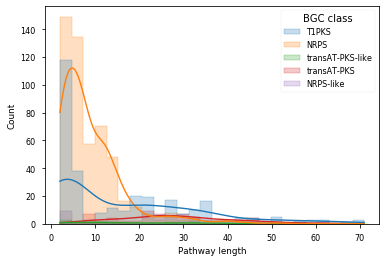

In [125]:
sns.histplot(data = df_info[df_info["Pathway length"]>1], x = "Pathway length", hue = "BGC class", 
             kde = True, element = "step")

In [117]:
df_info

,ID,Pathway length,Total number of reactions,BGC_x,BGC type,BGC_y,BGC class
0,1,18,20,1,T1PKS,1,T1PKS
1,100,36,38,100,T1PKS,100,T1PKS
2,1000,6,8,1000,NRPS,1000,NRPS
3,1001,16,18,1001,NRPS,1001,NRPS
4,1002,6,28,1002,NRPS,1002,NRPS
...,...,...,...,...,...,...,...
1071,995,30,32,995,transAT-PKS,995,transAT-PKS
1072,996,4,6,996,NRPS,996,NRPS
1073,997,7,29,997,NRPS,997,NRPS
1074,998,11,33,998,NRPS,998,NRPS


In [104]:
sns.histplot?

In [ ]:
sns.__version__

In [126]:
df_substrates = pd.DataFrame(substrate_dct_list)

In [127]:
df_substrates.index = df_info["ID"]

In [145]:
df_substrates

,index,malcoa_c,h_c,nadph_c,mmcoa__R_c,13dpg_c,emcoa__S_c,gly_c,amet_c,atp_c,...,d2hoiv_c,3mglutr_c,n11d1at_c,nadp_c,skm_c,26dap__M_c,L2aadp_c,ppcoa_c,BGC,BGC class
0,0,-6.0,-6.0,-6.0,-2.0,-1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,T1PKS
1,1,-6.0,-14.0,-14.0,-7.0,NaN,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,T1PKS
2,2,-2.0,-1.0,-1.0,NaN,NaN,NaN,-1.0,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000,NRPS
3,3,-6.0,-5.0,-5.0,NaN,NaN,NaN,NaN,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,NRPS
4,4,-2.0,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1002,NRPS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,1071,-12.0,-9.0,-9.0,NaN,-1.0,NaN,NaN,-2.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,995,transAT-PKS
1072,1072,-2.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,996,NRPS
1073,1073,-2.0,-1.0,-1.0,NaN,NaN,NaN,-1.0,NaN,-3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,997,NRPS
1074,1074,-4.0,-4.0,-4.0,NaN,NaN,NaN,-1.0,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998,NRPS


In [135]:
df_substrates = df_substrates.abs()
df_substrates = df_substrates.merge(df_success[["BGC", "BGC class"]], left_on="ID", right_on= "BGC")


TypeError: bad operand type for abs(): 'str'

In [144]:
df_substrates = df_substrates.reset_index()

KeyError: 'ID'

In [143]:
df_substrates

,index,malcoa_c,h_c,nadph_c,mmcoa__R_c,13dpg_c,emcoa__S_c,gly_c,amet_c,atp_c,...,d2hoiv_c,3mglutr_c,n11d1at_c,nadp_c,skm_c,26dap__M_c,L2aadp_c,ppcoa_c,BGC,BGC class
0,0,-6.0,-6.0,-6.0,-2.0,-1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,T1PKS
1,1,-6.0,-14.0,-14.0,-7.0,NaN,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,T1PKS
2,2,-2.0,-1.0,-1.0,NaN,NaN,NaN,-1.0,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000,NRPS
3,3,-6.0,-5.0,-5.0,NaN,NaN,NaN,NaN,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,NRPS
4,4,-2.0,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1002,NRPS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,1071,-12.0,-9.0,-9.0,NaN,-1.0,NaN,NaN,-2.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,995,transAT-PKS
1072,1072,-2.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,996,NRPS
1073,1073,-2.0,-1.0,-1.0,NaN,NaN,NaN,-1.0,NaN,-3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,997,NRPS
1074,1074,-4.0,-4.0,-4.0,NaN,NaN,NaN,-1.0,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998,NRPS


In [159]:
df = pd.melt(df_substrates, id_vars=['BGC', "BGC class"], value_vars = value_vars, value_name='Value')

In [175]:
df_substrates.drop("")

array([578350, -3005.0, -2742.0, -2870.0, -884.0, -62.0, -117.0, -928.0,
       -483.0, -2647.0, -930.0, -10.0, -698.0, -779.0, -737.0, -644.0,
       -566.0, -601.0, -501.0, -511.0, -1006.0, -968.0, -442.0, -568.0,
       -505.0, -467.0, -645.0, -614.0, -593.0, -488.0, -142.0, -24.0,
       -24.0, -4.0, -11.0, -42.0, -29.0, -31.0, -6.0, -2.0, -32.0, -48.0,
       -23.0, -23.0, -23.0, -23.0, -37.0, -21.0, -2.0, -2.0, -3.0, -4.0,
       -1.0, -1.0, -4.0, -3.0, 1080182,
       'T1PKST1PKSNRPSNRPSNRPSNRPST1PKStransAT-PKS-likeT1PKST1PKSNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPST1PKSNRPSNRPSNRPSNRPStransAT-PKSNRPSNRPSNRPSNRPST1PKSNRPStransAT-PKStransAT-PKSNRPSNRPSNRPSNRPSNRPST1PKSNRPST1PKSNRPStransAT-PKS-likeNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPST1PKSNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPST1PKST1PKST1PKST1PKST1PKST1PKST1PKST1PKStransAT-PKST1PKStransAT-PKStransAT-PKST1PKST1PKSNRPSNRPStransAT-PKS-liketransAT-PKST1PKStransAT-PKStransAT-PKStransAT-PKStransAT-PKS-likeNRPStransAT-PKStransAT-PKSt

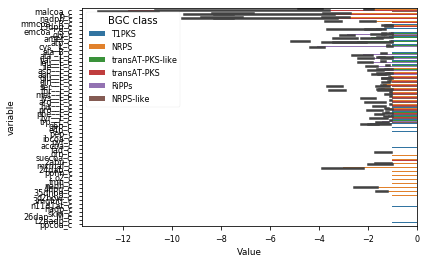

In [168]:
sns.barplot(data = df, x = "Value", hue = "BGC class", y = "variable")

In [156]:
value_vars = [x for x in df_substrates.columns if not x in ["BGC", "BGC class", "index"]]

In [155]:
value_vars = 

Index(['index', 'malcoa_c', 'h_c', 'nadph_c', 'mmcoa__R_c', '13dpg_c',
       'emcoa__S_c', 'gly_c', 'amet_c', 'atp_c', 'cys__L_c', 'ala_B_c',
       'ala__L_c', 'val__L_c', 'leu__L_c', 'ile__L_c', 'asp__L_c', 'asn__L_c',
       'glu__L_c', 'gln__L_c', 'ser__L_c', 'thr__L_c', 'met__L_c', 'lys__L_c',
       'arg__L_c', 'his__L_c', 'pro__L_c', 'phe__L_c', 'tyr__L_c', 'trp__L_c',
       'g6p_c', 'e4p_c', 'pep_c', 'ibcoa_c', 'pyr_c', 'accoa_c', 'fad_c',
       'orn_c', 'succoa_c', '2abu_c', 'mxmal_c', '24dab_c', 'pphn_c', 'o2_c',
       'fmn_c', 'nadh_c', '4hpg_c', '35dhpg_c', 'd2hoiv_c', '3mglutr_c',
       'n11d1at_c', 'nadp_c', 'skm_c', '26dap__M_c', 'L2aadp_c', 'ppcoa_c',
       'BGC', 'BGC class'],
      dtype='object')

In [149]:
value_vars = df_substrates.columns

,index,malcoa_c,h_c,nadph_c,mmcoa__R_c,13dpg_c,emcoa__S_c,gly_c,amet_c,atp_c,...,d2hoiv_c,3mglutr_c,n11d1at_c,nadp_c,skm_c,26dap__M_c,L2aadp_c,ppcoa_c,BGC,BGC class
0,0,-6.0,-6.0,-6.0,-2.0,-1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,T1PKS
1,1,-6.0,-14.0,-14.0,-7.0,NaN,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,T1PKS
2,2,-2.0,-1.0,-1.0,NaN,NaN,NaN,-1.0,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000,NRPS
3,3,-6.0,-5.0,-5.0,NaN,NaN,NaN,NaN,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,NRPS
4,4,-2.0,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1002,NRPS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,1071,-12.0,-9.0,-9.0,NaN,-1.0,NaN,NaN,-2.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,995,transAT-PKS
1072,1072,-2.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,996,NRPS
1073,1073,-2.0,-1.0,-1.0,NaN,NaN,NaN,-1.0,NaN,-3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,997,NRPS
1074,1074,-4.0,-4.0,-4.0,NaN,NaN,NaN,-1.0,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998,NRPS


In [134]:
sns.barplot(data = df_substrates, x = hue = "BGC class")

ValueError: Cannot use `hue` without `x` and `y`

In [ ]:
_get_model_info(model)

In [42]:
def _get_model_info(model):
    #    for r in model.reactions:
    #        print(r.id, "\t", r.reaction)
    n_reactions_total = len(model.reactions)
    n_reactions_link = 0
    for r in model.reactions:
        
        try:
            i = int(r.id.split("_")[-1])
        except:
            pass
        else:
            if i > n_reactions_link:
                n_reactions_link = i
    
    lump_reaction = _lump_reaction(model)
    substrate_dct = _get_substrate_dict(lump_reaction)
    return n_reactions_total, n_reactions_link, substrate_dct
    
def _lump_reaction(model):
    for i, r in enumerate(model.reactions):
        if i == 0:
            lump_reaction = r
        else:
            lump_reaction += r
    return lump_reaction

def _get_substrate_dict(r):
    dct = {}
    for m, i in r.metabolites.items():
        if i < 0:
            dct[m.id]=i
    return dct
    

In [ ]:
r = _lump_reaction(model)

In [ ]:
model.description